In [23]:
import tensorflow.lite as tflite
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load TFLite model and allocate tensors.
interpreter = tflite.Interpreter(model_path=r'C:\Users\jared\Deblur Project/jc implementation/litemodel.tflite')
#allocate the tensors
interpreter.allocate_tensors()

In [24]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

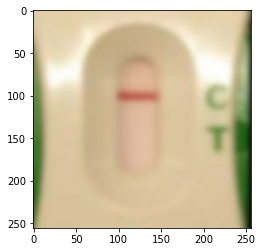

In [25]:
def load(image_file):
  # Read and decode an image file to a uint8 tensor
  image = tf.io.read_file(image_file)
  image = tf.io.decode_jpeg(image)

  # Split each image tensor into two tensors:
  # - one with a real building facade image
  # - one with an architecture label image 
  w = tf.shape(image)[1]
  w = w // 2
  input_image = image[:, w:, :]
  real_image = image[:, :w, :]

  # Convert both images to float32 tensors
  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  return input_image, real_image
image_path = r'C:\Users\jared\Deblur Project\input\test/filename70.jpg'
img, re = load(image_path)
#Preprocess the image to required size and cast
plt.imshow(img / 255.0)
img = (img / 127.5) -1
input_shape = input_details[0]['shape']
input_tensor= np.array(np.expand_dims(img,0))

In [26]:
input_index = interpreter.get_input_details()[0]["index"]
interpreter.set_tensor(input_index, input_tensor)
interpreter.invoke()
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])
results = np.squeeze(output_data)
results = (results + 1) * 127.5

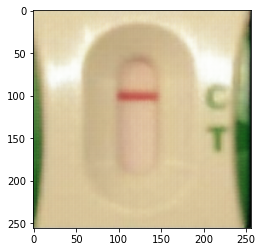

In [27]:
plt.imshow(results /255)